In [106]:
import pandas as pd
import matplotlib.pyplot as plt

#read the csv file and assign it to df
df = pd.read_csv("../data/WWE_History_1000_Cleaned.csv")

Basic Dataset Overview

In [107]:
# Dataset shape
print("Rows, Columns:", df.shape)

# Column info
df.info()

# Statistical summary (only meaningful for numeric columns)
df.describe()


Rows, Columns: (855, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Match ID     855 non-null    int64 
 1   Date         855 non-null    object
 2   Event        855 non-null    object
 3   Winner       855 non-null    object
 4   Loser        855 non-null    object
 5   Title Match  855 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 40.2+ KB


,Match ID,Title Match
count,855.000000,855.000000
mean,25.445614,0.513450
std,14.463684,0.500112
min,1.000000,0.000000
25%,13.000000,0.000000
50%,25.000000,1.000000
75%,38.000000,1.000000
max,50.000000,1.000000


Total Matches Per Wrestler (Participation Analysis)

In [108]:
# Combine winner and loser into one series
all_wrestlers = pd.concat([df['Winner'], df['Loser']])

# Count total matches per wrestler
match_counts = all_wrestlers.value_counts()

# Top 10 most active wrestlers
match_counts.head(10)


John Cena          42
Roman Reigns       42
Brock Lesnar       42
Seth Rollins       42
Randy Orton        42
Aj Styles          42
Edge               42
Kevin Owens        42
Bobby Lashley      42
Charlotte Flair    42
Name: count, dtype: int64

Win & Loss Counts Per Wrestler

In [109]:
# Total wins per wrestler
win_counts = df['Winner'].value_counts()

# Total losses per wrestler
loss_counts = df['Loser'].value_counts()

# Combine wins and losses into one DataFrame
performance_df = pd.DataFrame({
    'Wins': win_counts,
    'Losses': loss_counts
}).fillna(0).astype(int)

# Add total matches
performance_df['Total Matches'] = performance_df['Wins'] + performance_df['Losses']

# Sort by wins
performance_df.sort_values(by='Wins', ascending=False).head(10)


,Wins,Losses,Total Matches
Adam Cole,21,21,42
Aj Styles,21,21,42
Aleister Black,21,21,42
Asuka,21,21,42
Bayley,21,21,42
Becky Lynch,21,21,42
Bobby Lashley,21,21,42
Brock Lesnar,21,21,42
Bronson Reed,21,21,42
Charlotte Flair,21,21,42


Win–Loss Ratio

In [110]:
# Calculate win-loss ratio
performance_df['Win Rate'] = (
    performance_df['Wins'] / performance_df['Total Matches']
)

# Top 10 by win rate (minimum 10 matches to avoid noise)
performance_df[performance_df['Total Matches'] >= 10] \
    .sort_values(by='Win Rate', ascending=False) \
    .head(10)


,Wins,Losses,Total Matches,Win Rate
Morrison,20,0,20,1.0
The Miz,20,0,20,1.0
Adam Cole,21,21,42,0.5
Asuka,21,21,42,0.5
Bayley,21,21,42,0.5
Becky Lynch,21,21,42,0.5
Bobby Lashley,21,21,42,0.5
Brock Lesnar,21,21,42,0.5
Bronson Reed,21,21,42,0.5
Aj Styles,21,21,42,0.5


Event Analysis

In [111]:
# Matches per event
event_counts = df['Event'].value_counts()

# Top 10 events
event_counts.head(10)


Event
Royal Rumble           95
Wrestlemania           95
Money In The Bank      95
Backlash               95
Elimination Chamber    94
Summerslam             77
Survivor Series        77
Hell In A Cell         77
Fastlane               77
Extreme Rules          73
Name: count, dtype: int64

Title Match Analysis

In [112]:
# Count title vs non-title matches
title_match_counts = df['Title Match'].value_counts()

title_match_counts
# Percentage distribution
title_match_percentage = title_match_counts / len(df) * 100
title_match_percentage


Title Match
1    51.345029
0    48.654971
Name: count, dtype: float64

Wrestler Performance in Title Matches

In [113]:
# Filter title matches only
title_matches = df[df['Title Match'] == 1]

# Wins in title matches
title_wins = title_matches['Winner'].value_counts()

# Top title match winners
title_wins.head(10)


Winner
Dexter Lumis    12
Walter          12
Keith Lee       12
Pete Dunne      12
Sasha Banks     11
Brock Lesnar    11
Edge            11
Kevin Owens     11
John Cena       11
R-Truth         11
Name: count, dtype: int64

Time-Based Analysis

In [114]:
# Extract year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Matches per year
matches_per_year = df['Year'].value_counts().sort_index()




Visualizations

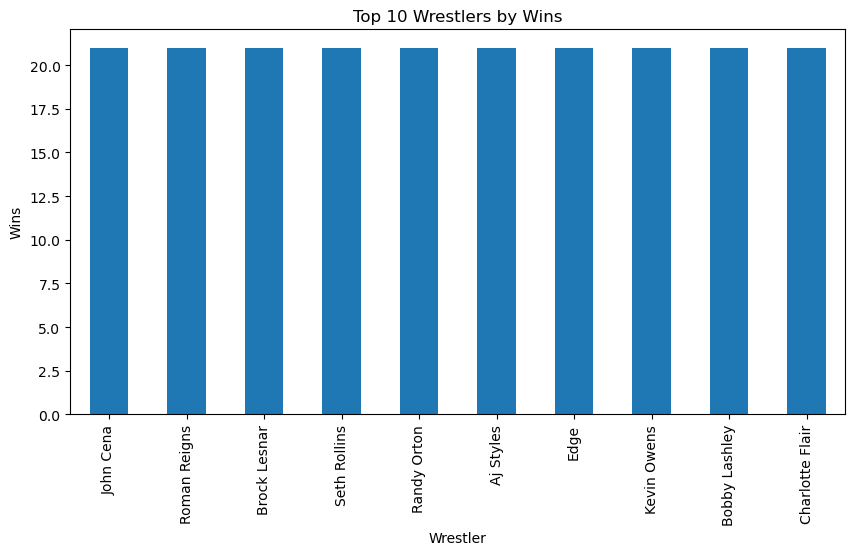

In [115]:

# Top 10 by wins
top_10_wins = win_counts.head(10)

top_10_wins.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Wrestlers by Wins")
plt.xlabel("Wrestler")
plt.ylabel("Wins")
plt.show()


Matches Per Year

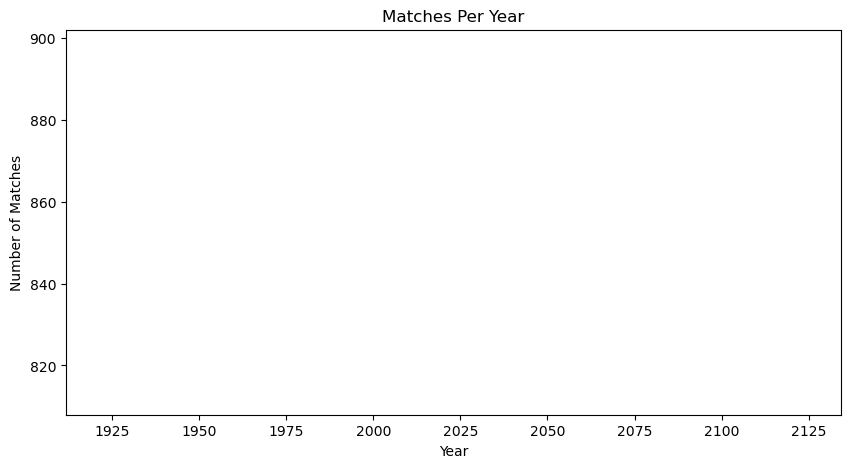

0    2023
1    2023
2    2023
3    2023
4    2023
Name: Year, dtype: int32

In [116]:
import matplotlib.pyplot as plt
matches_per_year.plot(kind='line', figsize=(10,5))
plt.title("Matches Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()
df['Year'].head()
